In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
from statsmodels import robust
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import KNeighborsClassifier

# Boxplot

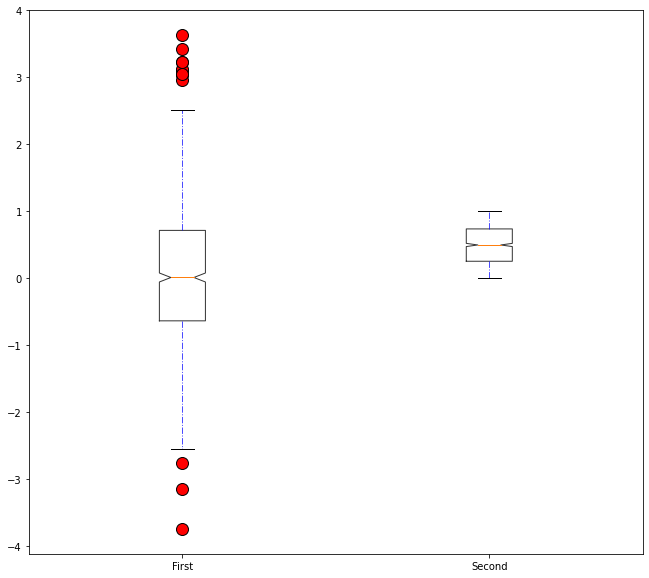

In [277]:
N=1000
data1=np.random.randn(N)
data2=np.random.rand(N)  
data=[data1,data2]

flierprops = dict(marker='o', markerfacecolor='red', markersize=12,linestyle='none')
line_props = dict(color="b", alpha=0.7,linestyle="-.")
bbox_props = dict(color="k", alpha=0.8)

fig,ax=plt.subplots(1,figsize=(11,10))
plt.boxplot(data,notch=True,whiskerprops=line_props,boxprops=bbox_props, flierprops=flierprops)
plt.xticks([1, 2], ['First', 'Second'])

plt.show()

# Histogram

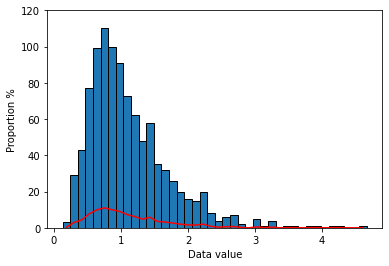

In [543]:
N=1001
data=np.exp(np.random.randn(N)/2)

k=40

y,x=np.histogram(data,40)
xx=(x[1:]+x[:-1])/2
portion=(y[0:]/sum(y))*100

plt.plot(xx,portion,linestyle='solid',color='red')
plt.hist(data,bins=k, edgecolor="k")
plt.ylim(0,120)
plt.xlabel('Data value')
plt.ylabel('Proportion %')

plt.show()

# Logarithm

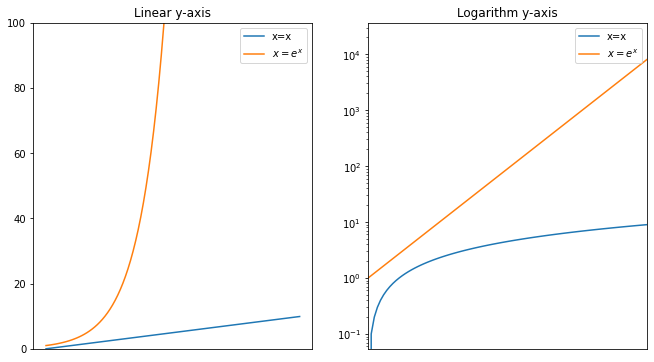

In [536]:
x=np.arange(0,10,0.1)
y=x
y1=[z**i for i in x]

fig, ax = plt.subplots(1, 2,figsize=(11,6))

ax[0].set_title('Linear y-axis')
ax[0].set_ylim([0,100])
ax[0].plot(x,y,label='x=x')
ax[0].plot(x,y1,label=r'$x=e^x$')
ax[0].get_xaxis().set_visible(False)
ax[0].legend()

ax[1].set_title('Logarithm y-axis')
ax[1].plot(x,y,label='x=x')
ax[1].plot(x,y1,label=r'$x=e^x$')
ax[1].set_xlim([0.001,9])
ax[1].get_xaxis().set_visible(False)
ax[1].set_yscale('log')
ax[1].legend()

plt.show()

# Histogram

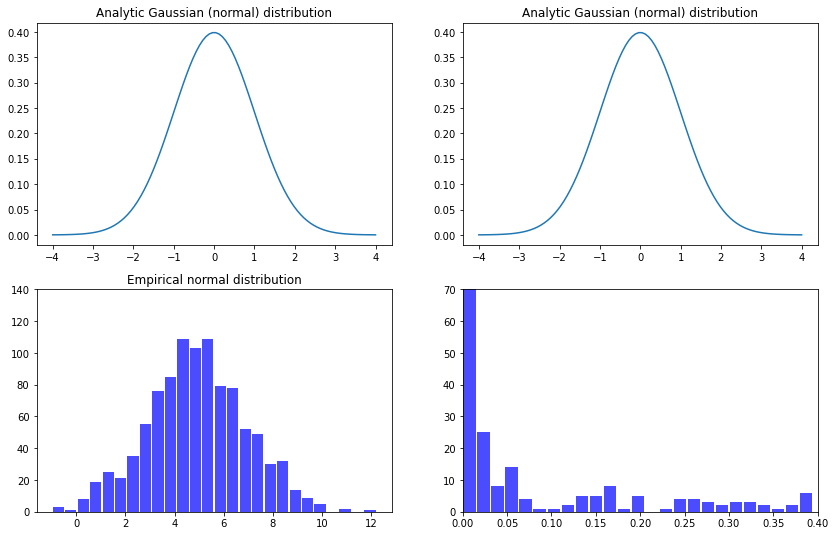

In [128]:
x = np.linspace(-4,4,100)
N=1000
data=2*np.random.randn(N,1)+5

fig,ax=plt.subplots(2,2,figsize=(14,9))
ax[0,0].set_title('Analytic Gaussian (normal) distribution')
ax[0,0].plot(x,stats.norm.pdf(x))

ax[0,1].set_title('Analytic Gaussian (normal) distribution')
ax[0,1].plot(x,stats.norm.pdf(x))

ax[1,0].set_title('Empirical normal distribution')
ax[1,0].hist(data,bins='fd',rwidth=.9,facecolor='blue', alpha=0.7)
ax[1,0].set_ylim([0,140])

ax[1,1].hist(norm.pdf(data),25,rwidth=.9,facecolor='blue', alpha=0.7)
ax[1,1].set_ylim([0,70])
ax[1,1].set_xlim([0,0.4])

plt.show()

# Central tendecity and outliers

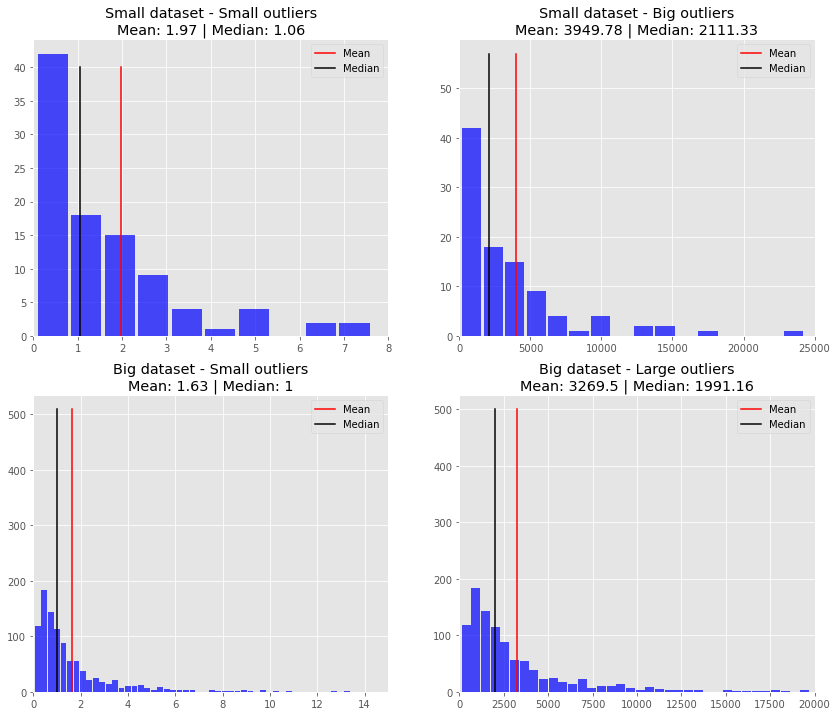

In [167]:
x=np.random.randn(100,1)
x1=np.random.randn(1000,1)

plt.style.use('ggplot')
fig,ax=plt.subplots(2,2,figsize=(14,12))

ax[0,0].set_title('Small dataset - Small outliers\n' + 'Mean: %g'%round(np.mean(np.exp(x)),2) + ' | Median: %g'%round(np.median(np.exp(x)),2))
ax[0,0].hist(np.exp(x),bins='fd',rwidth=.9,facecolor='#0000ff', alpha=0.7)
ax[0,0].plot([np.mean(np.exp(x)),np.mean(np.exp(x))],[0,40],color='r',label='Mean')
ax[0,0].plot([np.median(np.exp(x)),np.median(np.exp(x))],[0,40],color='k',label='Median')
ax[0,0].set_xlim([0,8])
ax[0,0].legend()

ax[0,1].set_title('Small dataset - Big outliers\n' + 'Mean: %g'%round(np.mean(np.exp(x)*2000),2) + ' | Median: %g'%round(np.median(np.exp(x)*2000),2))

ax[0,1].hist(np.exp(x)*2000,bins='fd',rwidth=.9,facecolor='#0000ff', alpha=0.7)
ax[0,1].plot([np.mean(np.exp(x)*2000),np.mean(np.exp(x)*2000)],[0,y_scale],color='r',label='Mean')
ax[0,1].plot([np.median(np.exp(x)*2000),np.median(np.exp(x)*2000)],[0,y_scale],color='k',label='Median')
ax[0,1].set_xlim([0,25000])
ax[0,1].legend()

ax[1,0].set_title('Big dataset - Small outliers\n' + 'Mean: %g'%round(np.mean(np.exp(x1)),2) + ' | Median: %g'%round(np.median(np.exp(x1)),2))
ax[1,0].hist(np.exp(x1),bins='fd',rwidth=.9,facecolor='#0000ff', alpha=0.7)
ax[1,0].plot([np.mean(np.exp(x1)),np.mean(np.exp(x1))],[0,y_scale1],color='r',label='Mean')
ax[1,0].plot([np.median(np.exp(x1)),np.median(np.exp(x1))],[0,y_scale1],color='k',label='Median')
ax[1,0].set_xlim([0,15.0])
ax[1,0].legend()

ax[1,1].set_title('Big dataset - Large outliers\n' + 'Mean: %g'%round(np.mean(np.exp(x1)*2000),2) + ' | Median: %g'%round(np.median(np.exp(x1)*2000),2))
ax[1,1].hist(np.exp(x1)*2000,bins='fd',rwidth=.9,facecolor='#0000ff', alpha=0.7)
ax[1,1].set_xlim([0,20000])
ax[1,1].plot([np.mean(np.exp(x1)*2000),np.mean(np.exp(x1)*2000)],[0,500],color='r',label='Mean')
ax[1,1].plot([np.median(np.exp(x1)*2000),np.median(np.exp(x1)*2000)],[0,500],color='k',label='Median')

ax[1,1].legend()

plt.show()

# Violin plot

<AxesSubplot:xlabel='dummy', ylabel='value'>

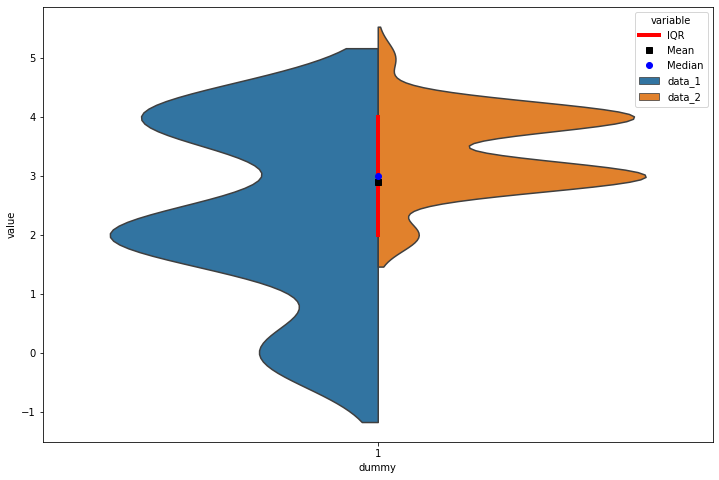

In [130]:
lognormal=(2-np.linspace(1,17,100)//7)*2
randomnormal=(3-np.random.normal(1,7,100)//11)

data = pd.DataFrame({'data_1':lognormal, 'data_2':randomnormal})
data = data.melt()
data['dummy'] = 1

q75, q25 = np.percentile((data.value), [75 ,25])

fig,ax=plt.subplots(1,1,figsize=(12,8))

plt.plot([0,0],[q25,q75],'r-',linewidth=4,label='IQR')
plt.plot(0.0,np.mean((data.value)),'ks',label='Mean')
plt.plot(0.0,np.median((data.value)),'bo',label='Median')
plt.legend()

sns.violinplot(ax=ax,data=data, y='value',split=True, hue='variable', x='dummy',inner=None,scale='count')

# Entropy and numbers of bin

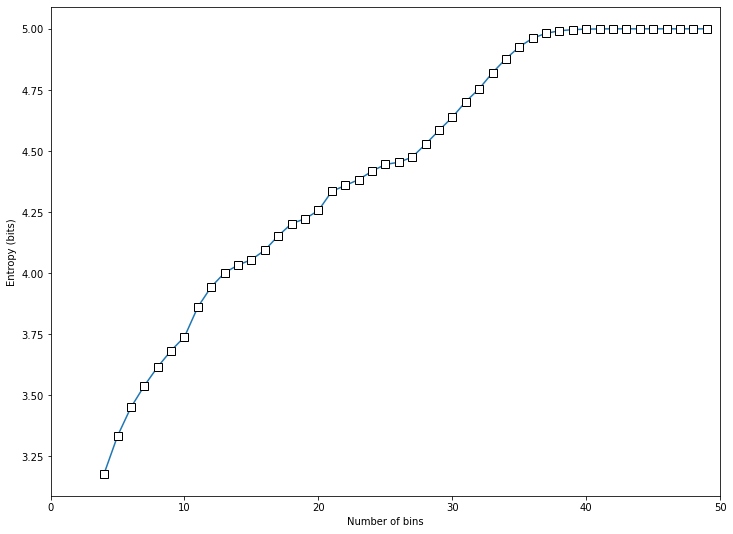

In [468]:
# create Brown noise
N=1123
brownnoise=np.cumsum(2*np.sign(np.random.randn(N)))

nbins=50
nPerBin,bins=np.histogram(brownnoise,nbins)

# compute entropy
x=[]
y=[]
for i in range(50):
    probs=nPerBin[:i]/sum(nPerBin)
    y.append(i)
    x.append(-sum(probs*np.log2(probs+np.finfo(float).eps)))
    
filled_marker_style = dict(marker='s', markersize=8,
                           color='white',
                           markerfacecoloralt='black',
                           markeredgecolor='black')

fig,ax=plt.subplots(1,1,figsize=(12,9))
plt.plot(y[4:],norm.cdf(x[4:])*5)
plt.plot(y[4:],norm.cdf(x[4:])*5,'sk',
         fillstyle='full',**filled_marker_style)
plt.ylabel('Entropy (bits)')
plt.xlabel('Number of bins')
plt.xlim([0,50])

plt.show()

# Min-Max scaling

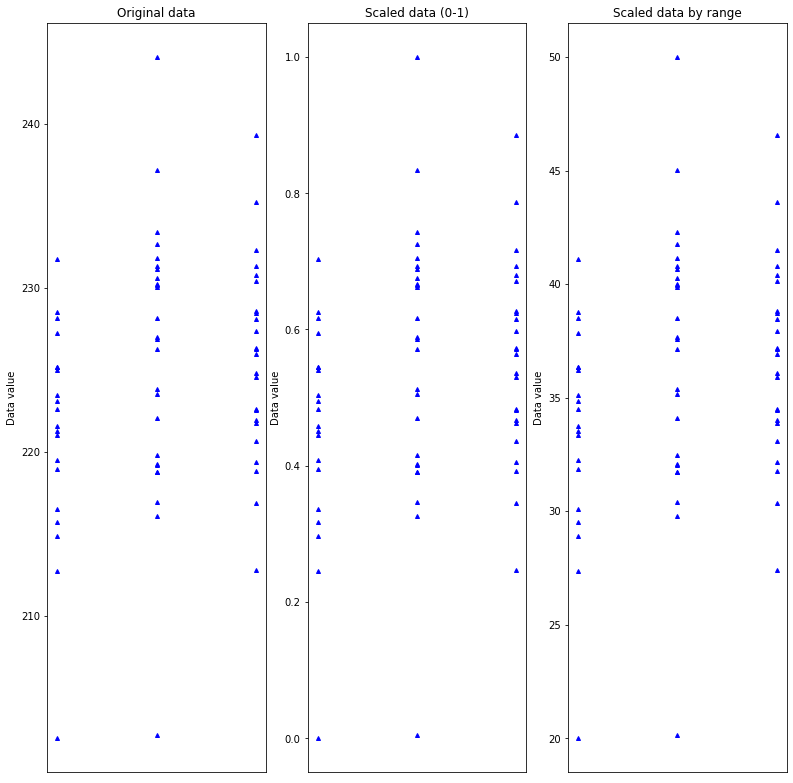

In [2]:
# create data
N=70
sigma=50
mu=15
data=np.sqrt(sigma) * np.random.randn(N) + mu**2
x=np.random.randint(1,4,len(data))

# min and max 
dataMin=min(data)
dataMax=max(data)

# min-max scale
dataS=(data-dataMin)/(dataMax-dataMin)

# scaled by range 
dMin=20
dMax=50
dataS_range=dMin+(dataS*(dMax-dMin))

fig,ax=plt.subplots(1,3,figsize=(11,11))
fig.tight_layout()

ax[0].plot(x,data,'b^',markersize=4)
ax[0].set_title('Original data')
ax[0].set_ylabel('Data value')
ax[0].get_xaxis().set_visible(False)

ax[1].plot(x,dataS,'b^',markersize=4)
ax[1].set_title('Scaled data (0-1)')
ax[1].set_ylabel('Data value')
ax[1].get_xaxis().set_visible(False)

ax[2].plot(x,dataS_range,'b^',markersize=4)
ax[2].set_title('Scaled data by range')
ax[2].set_ylabel('Data value')
ax[2].get_xaxis().set_visible(False)

plt.show()

# Z-score vs Modified Z-score

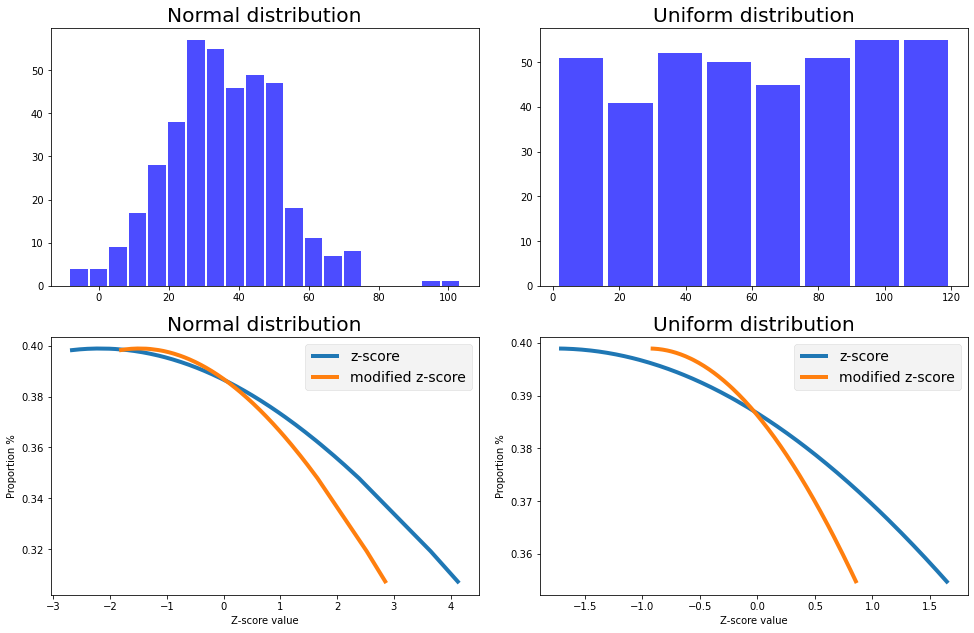

In [4]:
# create normal and uniform distribution
N=400 #size
mu=35  #mean
sigma=16 #standard deviation
normal=np.random.normal(mu,sigma,N)
uniform=np.random.uniform(1,120,N)

# proportion
proportion=(normal[0:]/sum(normal))*100
propU=(uniform[0:]/sum(uniform))*100

# Z score normal dist
# compute the mean and std
normal_mean=np.mean(normal)
normal_std=np.std(normal,ddof=1)

normalz=(normal-normal_mean)/normal_std

# Z score uniform dist
uniform_mean=np.mean(uniform)
uniform_std=np.std(uniform,ddof=1)

uniformz=(uniform-uniform_mean)/uniform_std

# Z-score
# compute modified z-score normal distribution
normalMed=np.median(normal)
normalMAD=robust.mad(normal)

normalMz=stats.norm.ppf(.75)*(normal-normalMed) / normalMAD

d=np.exp(normalMz)
normalMz_Proportion=(d[0:]/sum(d))*100

# compute modified z-score uniform distribution
uniformMed=np.median(uniform)
uniformMAD=robust.mad(uniform)

uniformMz=stats.norm.ppf(.75)*(uniform-uniformMed) / uniformMAD

d=np.exp(uniformMz)
uniformMz_Proportion=(d[0:]/sum(d))*100

# plot
fig,ax=plt.subplots(2,2,figsize=(14,9))
fig.tight_layout(pad=3)
plt.style.use('fivethirtyeight')

ax[0,0].set_title('Normal distribution')
ax[0,0].hist(normal,bins='fd',rwidth=.9,facecolor='#0000ff', alpha=0.7)

ax[0,1].set_title('Uniform distribution')
ax[0,1].hist(uniform,bins='fd',rwidth=.9,facecolor='#0000ff', alpha=0.7)

ax[1,0].set_title('Normal distribution')
ax[1,0].plot(sorted(normalz),norm.pdf(sorted(proportion)),label='z-score')
ax[1,0].plot(sorted(normalMz),norm.pdf(sorted(proportion)),label='modified z-score')
ax[1,0].set_xlabel('Z-score value')
ax[1,0].set_ylabel('Proportion %')
ax[1,0].legend()

ax[1,1].set_title('Uniform distribution')
ax[1,1].plot(sorted(uniformz),norm.pdf(sorted(propU)),label='z-score')
ax[1,1].plot(sorted(uniformMz),norm.pdf(sorted(propU)),label='modified z-score')
ax[1,1].set_xlabel('Z-score value')
ax[1,1].set_ylabel('Proportion %')
ax[1,1].legend()

plt.show()

# Probabilities odds-space

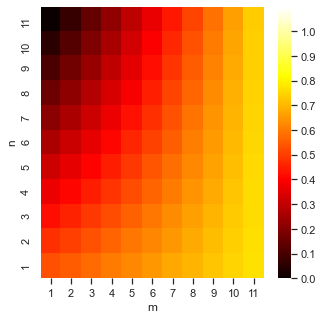

In [3]:
sns.set()

# create data
c=0.053
c1=0.069
m1=0
m2=0.7355

x=[]
for i in range(11):
    x.append(np.linspace(m1,m2,11,dtype=float))
    m1=m1+c
    m2=m2+c1*c
    
# plot correlation matrix
fig ,ax= plt.subplots(1,1,figsize=(5,5))
ax = sns.heatmap(x, cbar_kws={'ticks': [0, 0.1, 0.2,0.3,0.4, 0.5,0.6, 0.7, 0.8,0.9, 1]}, vmin=0, vmax=1.1,cmap='hot') 

ticks = np.arange(0,11,1)
ax.set_xticks(ticks+.5)
ax.set_yticks(ticks+.5)
ax.set_xticklabels([ 1,2,3,4,5,6,7,8,9,10,11])
ax.set_yticklabels([ 11,10,9,8,7,6,5,4,3,2,1])
ax.xaxis.set_ticks_position('bottom')
ax.grid()
ax.set_xlabel('m')
ax.set_ylabel('n')

plt.show() 

# CDF for various distribution

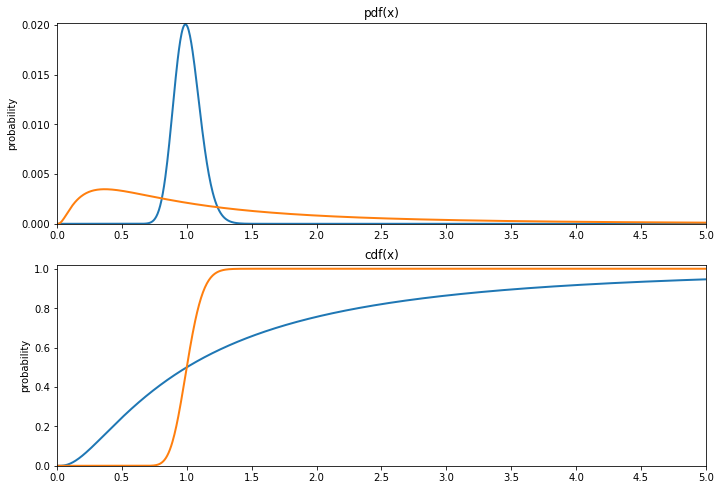

In [5]:
# create data
data=np.linspace(0,5,1001)

p1=stats.lognorm.pdf(data,1)
c1=stats.lognorm.cdf(data,.1)
p2=stats.lognorm.pdf(data,.1)
c2=stats.lognorm.cdf(data,1)

# plot
fig,ax=plt.subplots(2,1,figsize=(10,7))
fig.tight_layout(pad=2)

ax[0].plot(data,p2/sum(p2),linewidth=2)
ax[0].plot(data,p1/sum(p1),linewidth=2)
ax[0].set_yticks([ 0,0.005,0.01,0.015,0.02])
ax[0].set_ylim([0,0.0202])
ax[0].set_xticks([ 0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])
ax[0].set_xlim([0,5])
ax[0].set_title('pdf(x)')
ax[0].set_ylabel('probability')

ax[1].plot(data,c2,linewidth=2)
ax[1].plot(data,c1,linewidth=2)
ax[1].set_yticks([ 0,0.2,0.4,0.6,0.8,1])
ax[1].set_ylim([0,1.02])
ax[1].set_xticks([ 0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])
ax[1].set_xlim([0,5])
ax[1].set_ylabel('probability')
ax[1].set_title('cdf(x)')

plt.show()

# Averaging pairs of numbers

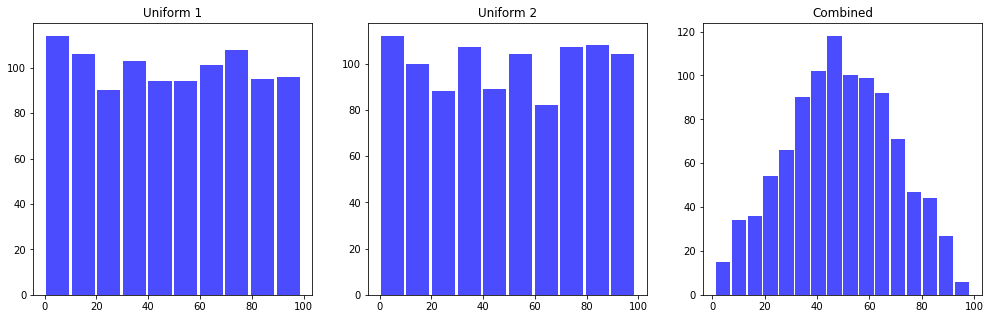

In [6]:
# create uniform distributions
uniform1=np.random.randint(0,100,1001,dtype=int)
uniform2=np.random.randint(0,100,1001,dtype=int)

# combine uniform distribution by average
combine=[(uniform1[i]+uniform2[i])/2 for i in range(len(uniform1))]

# plot
fg,ax=plt.subplots(1,3,figsize=(17,5))
ax[0].hist(uniform1,bins='fd',rwidth=.9,facecolor='#0000ff', alpha=0.7)
ax[0].set_title('Uniform 1')

ax[1].hist(uniform2,bins='fd',rwidth=.9,facecolor='#0000ff', alpha=0.7)
ax[1].set_title('Uniform 2')

ax[2].hist(combine,bins='fd',rwidth=.9,facecolor='#0000ff', alpha=0.7)
ax[2].set_title('Combined')
plt.show()

# The role of variance

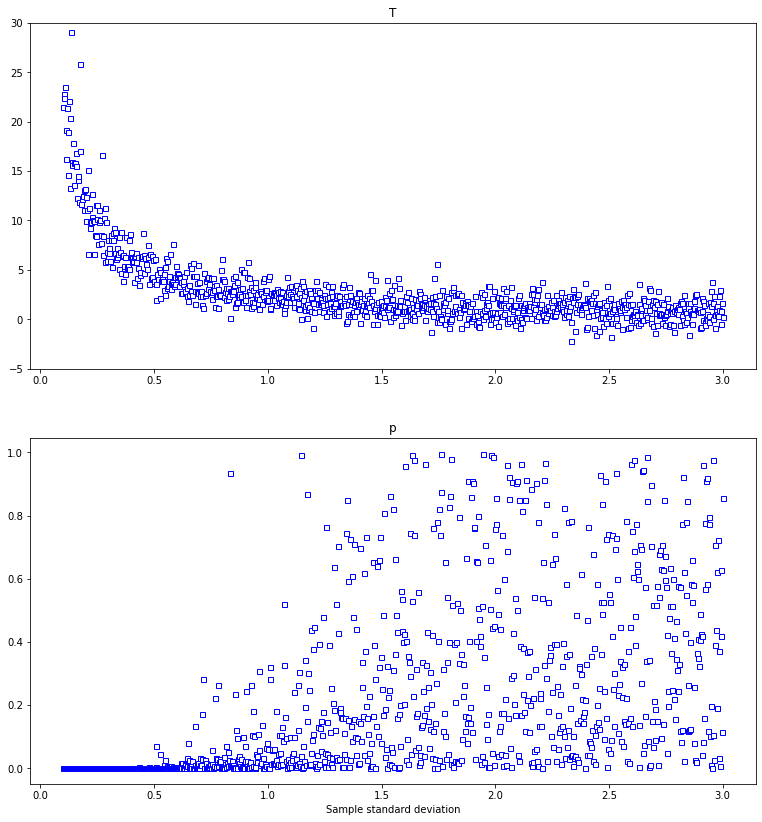

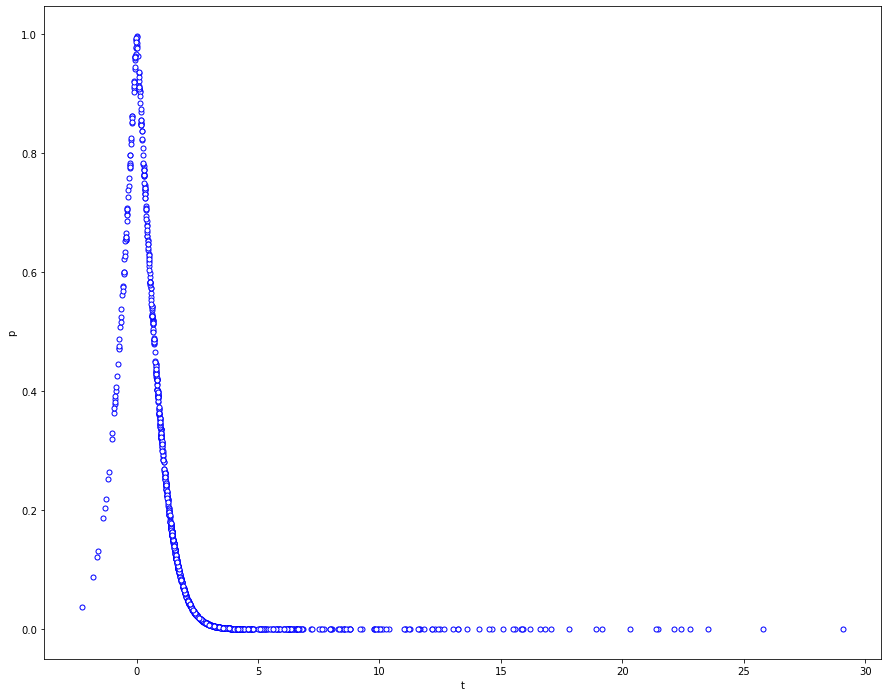

In [3]:
# create data
N=20 #sample size
popMu=.5 #true population mean
tval=[]
pval=[]
H0val=0
std=np.linspace(0.1,3,1000)

for i in std:
    data=i*np.random.randn(N)+popMu
    t,p=stats.ttest_1samp(data,H0val)
    tval.append(t)
    pval.append(p)
fig,ax=plt.subplots(2,1,figsize=(13,14))
ax[0].set_title('T')
ax[0].plot(std,tval,'bs',markerfacecolor='w',markersize=5)
ax[0].set_ylim([-5,30])
ax[1].set_title('p')
ax[1].plot(std,pval,'bs',markerfacecolor='w',markersize=5)
ax[1].set_xlabel('Sample standard deviation')

plt.show()

plt.subplots(1,1,figsize=(15,12))
plt.plot(tval,pval,'bo',markerfacecolor='w',markersize=5)
plt.xlabel('t')
plt.ylabel('p')
plt.show()

# Importance of N for t_test

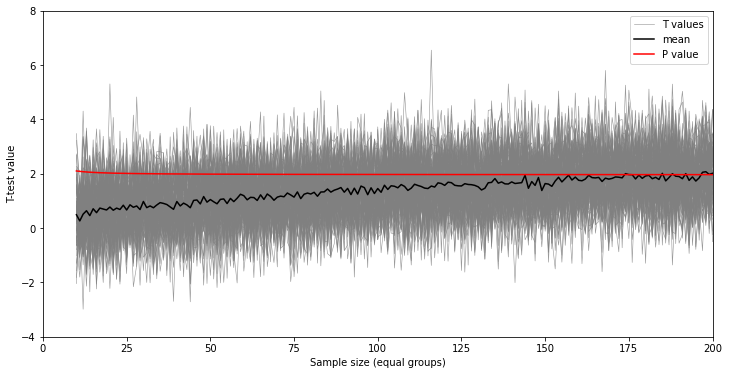

In [3]:
# info
mean1=1
mean2=1.2
num_exps=100
pval_thresh=.05
N=np.arange(10,201)

# create empty aaray for save p and t values
tvals = np.zeros((num_exps, len(N)))
pvals = np.zeros(len(N))

# do experiment and calculate p and t value
for i in range(num_exps):
    for j,k in enumerate(N):
        data1=mean1 + np.random.randn(k)
        data2=mean2 + np.random.randn(k)
        tvals[i,j]=stats.ttest_ind(data2,data1,equal_var=True)[0]
        df=len(data1)+len(data2)-2
        pvals[j]=stats.t.ppf(1-pval_thresh/2,df)
        
# plot
fig,ax=plt.subplots(figsize=(12,6))

ax.plot(N,tvals.T,color='gray',alpha=.8,linewidth=.6,label='T values')
ax.plot(N,tvals.mean(axis=0),color='black',label='mean')
ax.plot(N,pvals,color='red',label='P value')
ax.set_ylabel('T-test value')
ax.set_xlabel('Sample size (equal groups)')
ax.set_ylim([-4,8])
ax.set_xlim([0,200])

# remove duplicates labels
def legend_without_duplicate_labels(ax):
     handles, labels = ax.get_legend_handles_labels()
     unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
     ax.legend(*zip(*unique))
legend_without_duplicate_labels(ax)

plt.show()

# Permutation test

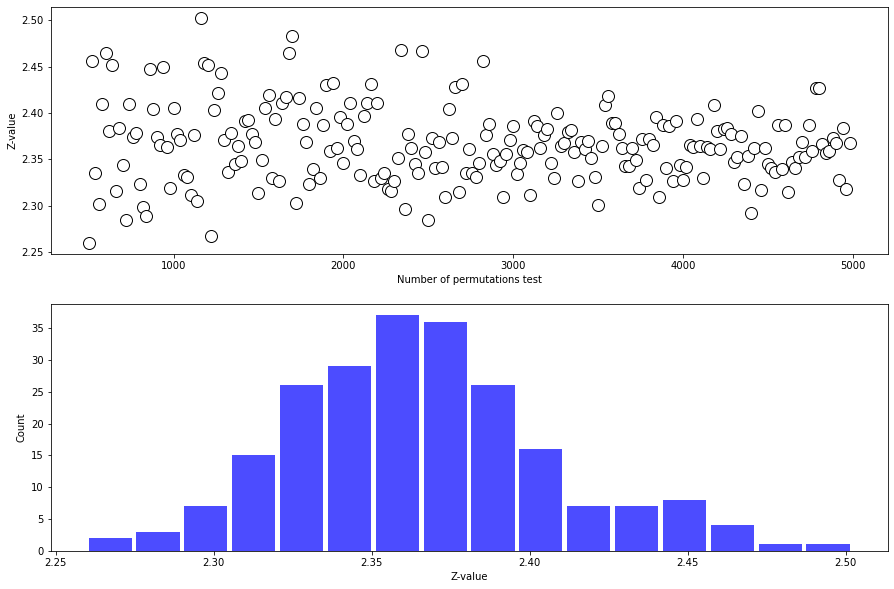

In [2]:
# number of trials
N=50

# dataset A
r=np.random.randn(N)
r[r>0]=np.log(1+r[r>0])
dataA=26+r*10

# dataset B
r=np.random.randn(N)
r[r>0]=np.log(1+r[r>0])
dataB=30+r*10

# mix trials together
# concatenate trials
alldata=np.hstack((dataA,dataB))

# condition labels
conds=np.hstack((np.ones(N),np.ones(N)*2))

nPerms=np.arange(500,5000,20)
zVal= np.zeros(len(nPerms))
obsval=np.mean(alldata[conds==2])-np.mean(alldata[conds==1])

# calculate z value
for idx,_ in enumerate(nPerms):
    permDiffs = np.zeros(nPerms[idx])
    
    for permi in range(nPerms[idx]):
        fconds=np.random.permutation(N*2)
        fconds[fconds<N]=1
        fconds[fconds>1]=2
        permDiffs[permi]=np.mean(alldata[fconds==2])-np.mean(alldata[fconds==1])
    zVal[idx]=((obsval-np.mean(permDiffs))/np.std(permDiffs,ddof=1))
    
# plot    
fig,ax = plt.subplots(nrows=2,figsize=(15,10))
ax[0].plot(nPerms,zVal,'ko',markerfacecolor='w',markersize=12)
ax[0].set_xlabel('Number of permutations test')
ax[0].set_ylabel('Z-value')

ax[1].hist(zVal,bins='fd',rwidth=.9,facecolor='#0000ff', alpha=0.7)
ax[1].set_xlabel('Z-value')
ax[1].set_ylabel('Count')

plt.show()

# Confidience interval of mean

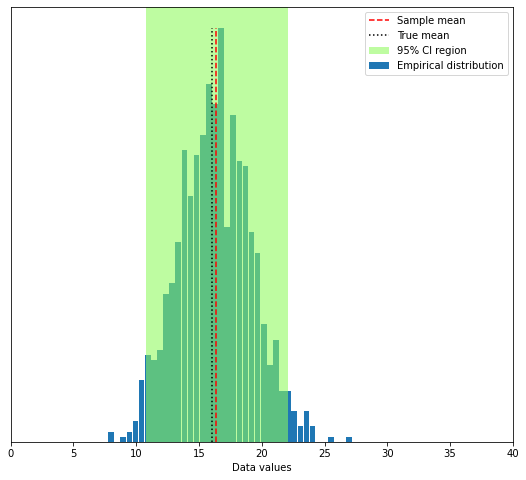

In [19]:
# Simulate population data
# data
popN=int(1e7)
population=(4*np.random.randn(popN))**2

# population mean
popMean=np.mean(population)

# draw random sample
# parameters
samplesize=40
confidence=95 #in percent

# compute sample mean
randSample=np.random.randint(0,popN,samplesize)

# compute mean and std
sampleData=population[randSample]
sampleMean=np.mean(population[randSample])
sampleStd=np.std(population[randSample])

# Bootstraping method
numBoots=1000
bootMeans=np.zeros(numBoots)

# resample with replacement
for booti in range(numBoots):
    bootMeans[booti]=np.mean(np.random.choice(sampleData,samplesize))
    
# find confidience intervals
confint=[0,0]
confint[0]=np.percentile(bootMeans,(100-confidence)/2)
confint[1]=np.percentile(bootMeans,100-(100-confidence)/2)

# start histogram of resampled means
y,x=np.histogram(bootMeans,40)
y=y/max(y)
x=(x[:-1]+x[1:])/2

# plot
fig,ax=plt.subplots(1,1,figsize=(9,8))

ax.bar(x,y,width=.45,label='Empirical distribution')
ax.plot([sampleMean,sampleMean],[0,1],'r--',label='Sample mean')
ax.plot([popMean,popMean],[0,1],'k:',label='True mean')
ax.set_xlabel('Data values')
ax.get_yaxis().set_visible(False)
plt.axvspan(confint[0],confint[1], facecolor='#8dfb5b', alpha=0.57,label='95% CI region')
plt.xlim([0,40])
plt.legend(loc=1)

plt.show()

# Average correlation matrix

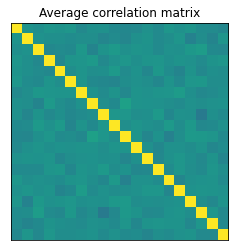

In [4]:
# data parameters
n=15
sets=20

# data lists
data_list = []
corr_matrices = []

# create matrix
for i in range(100):
    data_list.append(np.random.randn(sets,n))
    corr_matrices.append(np.corrcoef(data_list[i]))
    corr_mean=sum(corr_matrices)/len(corr_matrices)
    
# plot
fig, ax = plt.subplots()     
plt.imshow(corr_mean,vmin=-.5,vmax=.5)
plt.title('Average correlation matrix')
plt.xlabel('x')
plt.ylabel('y')
ax.get_xaxis().set_visible(False) 
ax.get_yaxis().set_visible(False) 
plt.show()

# Correlation to covariance matrix

<function matplotlib.pyplot.show(close=None, block=None)>

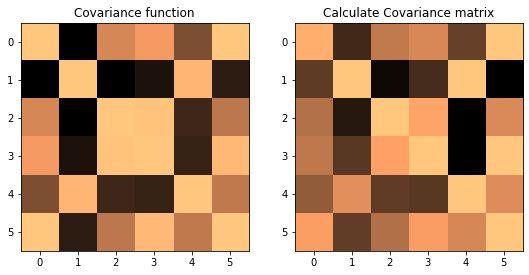

In [6]:
# dataset parameters
N=10
sets=6

# generate data
data=np.random.randn(sets,N)

# calculate covariance and correlation
cov=np.cov(data)
corr=np.corrcoef(data)

# calculate datsets std
std=np.zeros((6,6))
for i in range(6):
    std[i][i]=np.std(data[i],ddof=1)

# calculate covariance matrix by formula C=ΣRΣ
C=np.dot(corr,std)
C=np.dot(C,std)

fig,ax=plt.subplots(1,2,figsize=(9,9))

ax[0].imshow(corr,cmap='copper',vmin=-.5,vmax=.5)
ax[0].set_title('Covariance function')
ax[1].imshow(C,cmap='copper',vmin=-.5,vmax=.5)
ax[1].set_title('Calculate Covariance matrix')

plt.show

# Spearman correlation

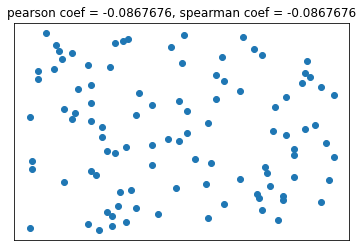

In [4]:
# generate data
x=np.random.randint(4,120,100)*.3
y=3+np.linspace(0,1,100)/.2

# create dataframe
d=pd.DataFrame({'x':x,'y':y})

# calculate ranks
ranks=d.rank()

# calculate spearman and pearson coef
p_coef=stats.pearsonr(ranks.x,ranks.y)[0]
s_coef=stats.spearmanr(ranks.x,ranks.y)[0]

# plot
plt.scatter(x,y)
plt.xticks([])
plt.yticks([])
plt.title('pearson coef = %g, spearman coef = %g'%(p_coef,s_coef))

plt.show()

# Confidience interval on correlation

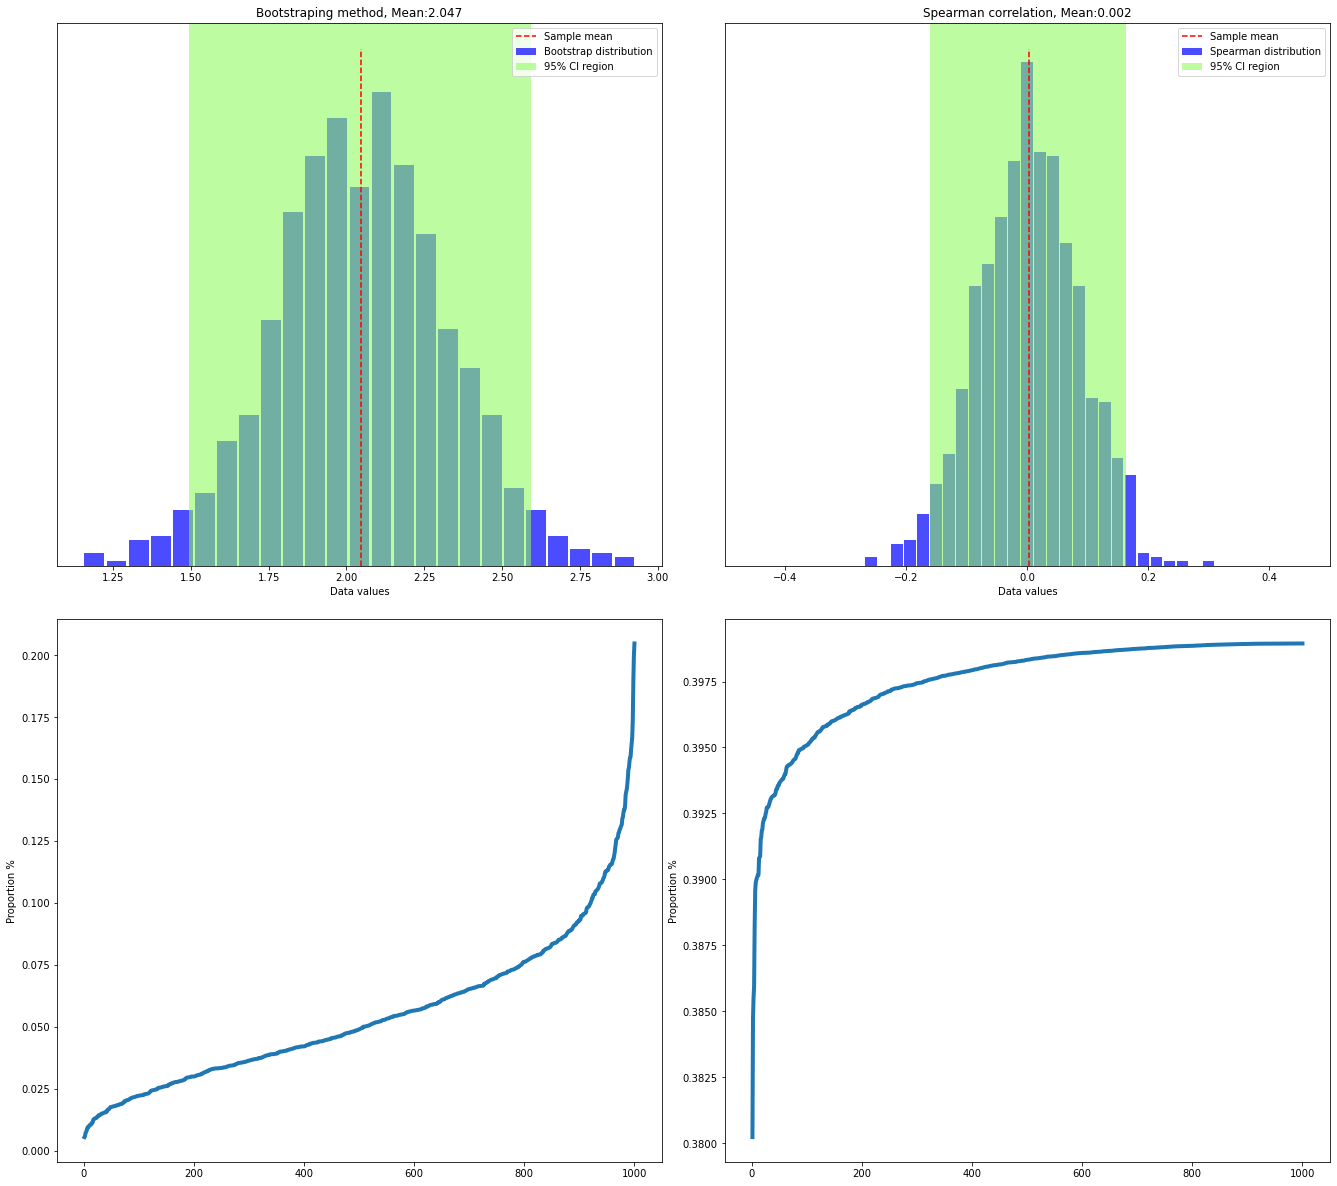

In [5]:
# data parameters
N=1000
sigma=2
mean=3.5

# generate data
data=sigma+np.random.randn(N)*mean

# draw random sample
samplesize=150
confidence=95

# issirinkom samples testavimui
randSample=np.random.randint(0,N,samplesize)


samples=data[randSample]

# bootstrap method
numBoots=1000
bootMeans=np.zeros(numBoots)

spearman=np.zeros(numBoots)


# random sample method
randSample=np.random.randint(0,N,samplesize)
# resampling
for booti in range(numBoots):
    bootMeans[booti]=np.mean(np.random.choice(samples,samplesize))
    spearman[booti]=stats.spearmanr(np.random.choice(samples,samplesize),np.random.choice(samples,samplesize))[0]
    

# find confidience intervals of bootstraping mean
confint=[0,0]
confint[0]=np.percentile(bootMeans,(100-confidence)/2)
confint[1]=np.percentile(bootMeans,100-(100-confidence)/2)

# find confidience intervals of bootstraping spearman correlation
confint_s=[0,0]
confint_s[0]=np.percentile(spearman,(100-confidence)/2)
confint_s[1]=np.percentile(spearman,100-(100-confidence)/2)


# means bootsrap methos  : mean and spearman coef sets
sampleMean=np.mean(bootMeans)
coefMean=np.mean(spearman)

num=np.linspace(1,1000,1000)

fig,ax=plt.subplots(2,2,figsize=(19,17))
fig.tight_layout(pad=3.2)
ax[0][0].hist(bootMeans,bins='fd',rwidth=.9,facecolor='#0000ff', alpha=0.7,label='Bootstrap distribution')
ax[0][0].plot([sampleMean,sampleMean],[0,120],'r--',label='Sample mean')
ax[0][0].set_xlabel('Data values')
ax[0][0].set_title('Bootstraping method, Mean:'+str(round(sampleMean,3)))
ax[0][0].get_yaxis().set_visible(False)
ax[0][0].axvspan(confint[0],confint[1], facecolor='#8dfb5b', alpha=0.57,label='95% CI region')
ax[0][0].legend(loc=1)


ax[0][1].hist(spearman,bins='fd',rwidth=.9,facecolor='#0000ff', alpha=0.7,label='Spearman distribution')
ax[0][1].plot([coefMean,coefMean],[0,120],'r--',label='Sample mean')
ax[0][1].set_title('Spearman correlation, Mean:'+ str(round(coefMean,3)))
ax[0][1].set_xlabel('Data values')
ax[0][1].get_yaxis().set_visible(False)
ax[0][1].axvspan(confint_s[0],confint_s[1], facecolor='#8dfb5b', alpha=0.57,label='95% CI region')
ax[0][1].set_xlim([-.5,.5])
ax[0][1].legend(loc=1)

ax[1][0].plot(num,sorted(stats.norm.pdf(bootMeans)),linewidth=4)
ax[1][0].set_ylabel('Proportion %')

ax[1][1].plot(num,sorted(stats.norm.pdf(spearman)),linewidth=4)
ax[1][1].set_ylabel('Proportion %')

plt.show()

# Kendall vs pearson correlations

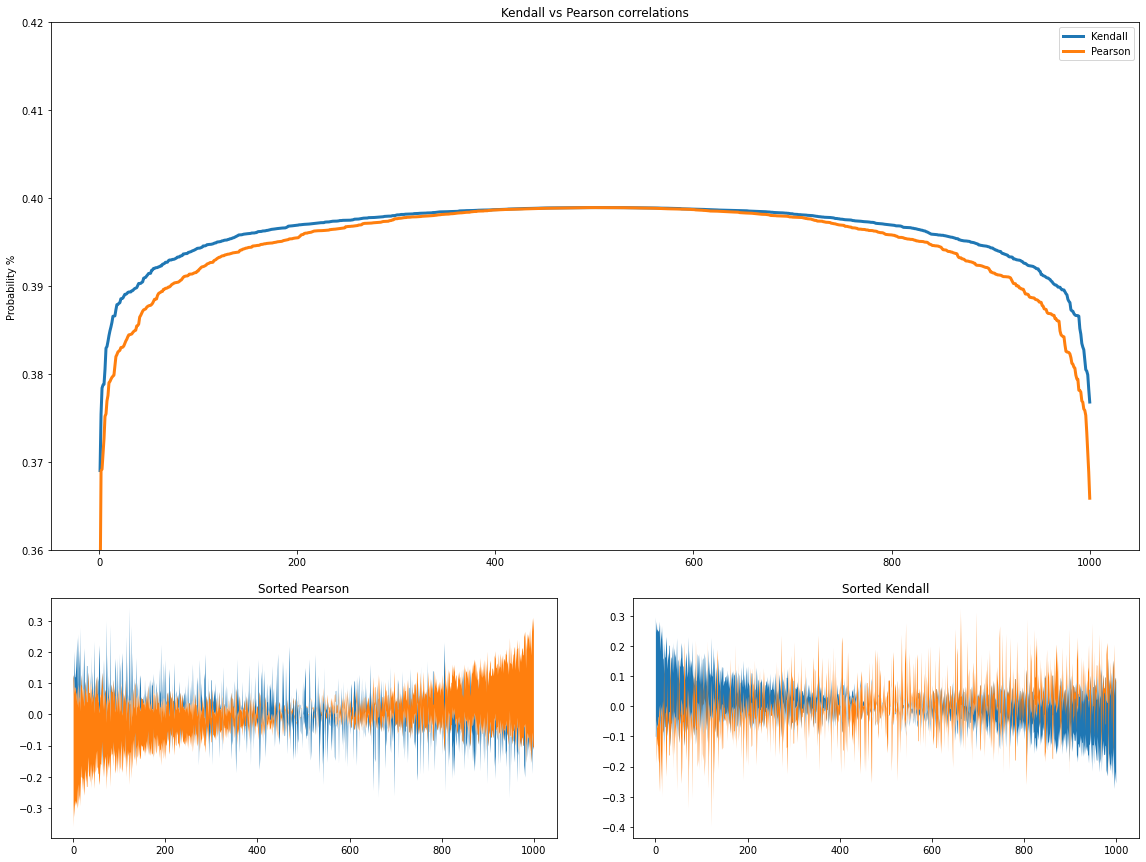

In [4]:
# parameters
experiments=1000
N=50
nCategories=5

# create empty list
kendal=[]
pearson=[]


# create experiments
for experiment in range(experiments):
    x=np.random.randint(0,nCategories,N)
    y=np.random.randint(0,nCategories,N)  
    
    kendal.append(stats.kendalltau(x,y)[0])
    pearson.append(stats.pearsonr(x,y)[0])

x=np.linspace(1,1000,1000)
labels=['kendall','pearson']

# plot
fig9 = plt.figure(figsize=(24,15),constrained_layout=False)
gs1 = fig9.add_gridspec(nrows=3, ncols=2, left=0.05, right=0.68,wspace=.15)

f9_ax1 = fig9.add_subplot(gs1[:-1, :])
f9_ax2 = fig9.add_subplot(gs1[-1, :1])
f9_ax3 = fig9.add_subplot(gs1[-1, -1])

f9_ax1.set_title('Kendall vs Pearson correlations')
f9_ax1.plot(x,stats.norm.pdf(sorted(kendal)),linewidth=3,label='Kendall')
f9_ax1.plot(x,stats.norm.pdf(sorted(pearson)),linewidth=3,label='Pearson')
f9_ax1.set_ylim([.36,.42])
f9_ax1.set_ylabel('Probability %')
f9_ax1.legend()

f9_ax2.stackplot(x,((kendal)),(sorted(pearson)),labels=labels,baseline='wiggle',linewidth=-3)
f9_ax2.set_title('Sorted Pearson')

f9_ax3.stackplot(x,(sorted(kendal)),((pearson)),labels=labels,baseline='wiggle',linewidth=-3)
f9_ax3.set_title('Sorted Kendall')

plt.show()

# Compute R2 and F

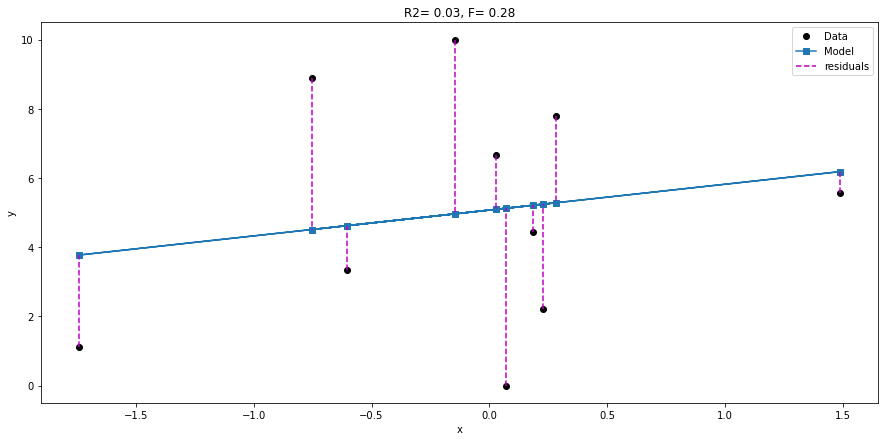

In [121]:
# generate data
N=10
x=np.random.randn(N)
y=np.linspace(0,10,N)

# design matrix
desmat=np.vstack((np.ones(N),x)).T

# compute regression parameters
beta=np.linalg.lstsq(desmat,y,rcond=None)[0]

# predict data values
yHat=desmat@beta

# R2 calculate
SSe=np.sum((y-yHat)**2)
SStotal=np.sum((y-np.mean(y))**2)
r2=1-(SSe/SStotal)

# calculate F
k=len(beta)
SSmodel=np.sum((yHat-np.mean(y))**2)
F=(SSmodel/(k-1))/(SSe/(N-k))

# plot
fig,ax=plt.subplots(1,1,figsize=(15,7))
plt.plot(x,y,'ko')
plt.plot(x,yHat,'s-')

for i in range(N):
    plt.plot([x[i],x[i]],[y[i],yHat[i]],'m--')
    
plt.title('R2= {0}, F= {1}'.format(round(r2,2),round(F,2)))
plt.xlabel('x')
plt.ylabel('y')
plt.legend(('Data','Model','residuals'))
plt.show()

# Polynomial design matrix

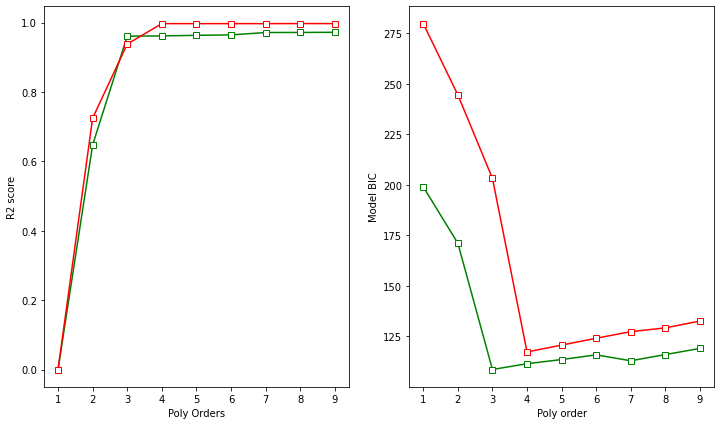

In [122]:
# generate data
n=30
x=np.linspace(-2,4,n)
# y1=x**2+np.random.randn(n)
# y2=x**3+np.random.randn(n)
y1=x**2+np.random.randn(n)
y2=x**3+np.random.randn(n)
orders=np.arange(1,10)

# output matrices
r2=np.zeros((2,len(orders)))
sse=np.zeros((2,len(orders)))

# calculate r2 score
for oi in range(len(orders)):
    # poly1
    pterms=np.polyfit(x,y1,oi)
    yHat1=np.polyval(pterms,x)

    # poly2
    pterms1=np.polyfit(x,y2,oi)
    yHat2=np.polyval(pterms1,x)
    
    #r2 score poly1
    SSe1=np.sum((y1-yHat1)**2)
    SStotal=np.sum((y1-np.mean(y1))**2)
    # r2[0,oi]=1-(SSe/SStotal)
    r2[0,oi]=(1-(SSe1/SStotal))
    sse[0,oi]=SSe1
    
    #r2 score poly2
    SSe2=np.sum((y2-yHat2)**2)
    SStotal=np.sum((y2-np.mean(y2))**2)
    r2[1,oi]=1-(SSe2/SStotal)
    sse[1,oi]=SSe2
    
# calculate BIC
bic=n*np.log(sse)+orders*np.log(n)

# plot
fig,ax=plt.subplots(1,2,figsize=(12,7))
ax[0].plot(orders,r2[0],'gs-',markerfacecolor='white')
ax[0].plot(orders,r2[1],'rs-',markerfacecolor='white')
ax[0].set_xlabel('Poly Orders')
ax[0].set_ylabel('R2 score')

ax[1].plot(orders,bic[0],'gs-',markerfacecolor='white')
ax[1].plot(orders,bic[1],'rs-',markerfacecolor='white')
ax[1].set_xlabel('Poly order')
ax[1].set_ylabel('Model BIC')

plt.show()

# Overfit data

C:\Users\Mano\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Mano\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


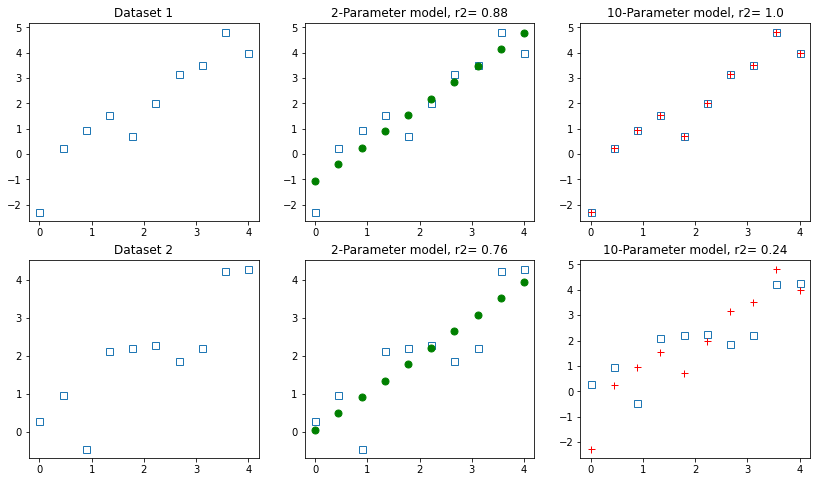

In [2]:
# generate data
x=np.linspace(0,4,10)
data1=x+np.random.randn(10)*.8
data2=x+np.random.randn(10)*.8

# dataset 1 predict model
pterms1=np.polyfit(x,data1,1)
y1Hat=np.polyval(pterms1,x)

pterms2=np.polyfit(x,data1,10)
y1Hat10=np.polyval(pterms2,x)

# dataset 2 predict model 
pterms3=np.polyfit(x,data2,1)
y2Hat=np.polyval(pterms3,x)

pterms4=np.polyfit(x,data2,10)
y2Hat10=np.polyval(pterms4,x)

# dataset 1 r2 score
SSe1=np.sum((data1-y1Hat)**2)
SStotal=np.sum((data1-np.mean(data1))**2)
r2_D1p1=(1-(SSe1/SStotal))

SSe1=np.sum((data1-y1Hat10)**2)
SStotal=np.sum((data1-np.mean(data1))**2)
r2_D1p10=(1-(SSe1/SStotal))

# dataset 2 r2 score
SSe1=np.sum((data2-y2Hat)**2)
SStotal=np.sum((data2-np.mean(data2))**2)
r2_D2p1=(1-(SSe1/SStotal))

SSe1=np.sum((data2-y1Hat10)**2)
SStotal=np.sum((data2-np.mean(data2))**2)
r2_D2p10=(1-(SSe1/SStotal))

fig,ax=plt.subplots(2,3,figsize=(14,8))
ax[0][0].set_title('Dataset 1')
ax[0][0].plot(x,data1,'.',marker='s',markerfacecolor='white',markersize=7)

ax[0][1].set_title('2-Parameter model, r2= {0}'.format(round(r2_D1p1,2)))
ax[0][1].plot(x,data1,'.',marker='s',markerfacecolor='white',markersize=7)
ax[0][1].plot(x,y1Hat,'og',markersize=7)

ax[0][2].set_title('10-Parameter model, r2= {0}'.format(round(r2_D1p10,2)))
ax[0][2].plot(x,data1,'.',marker='s',markerfacecolor='white',markersize=7)
ax[0][2].plot(x,y1Hat10,'+r',markerfacecolor='white',markersize=7)


ax[1][0].set_title('Dataset 2')
ax[1][0].plot(x,data2,'.',marker='s',markerfacecolor='white',markersize=7)

ax[1][1].set_title('2-Parameter model, r2= {0}'.format(round(r2_D2p1,2)))
ax[1][1].plot(x,data2,'.',marker='s',markerfacecolor='white',markersize=7)
ax[1][1].plot(x,y2Hat,'og',markersize=7)

ax[1][2].set_title('10-Parameter model, r2= {0}'.format(round(r2_D2p10,2)))
ax[1][2].plot(x,data2,'.',marker='s',markerfacecolor='white',markersize=7)
ax[1][2].plot(x,y1Hat10,'+r',markerfacecolor='white',markersize=7)

plt.show()

# K-means and normalizations

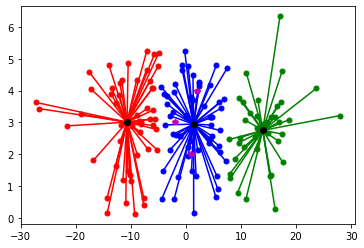

In [5]:
# parameters
N=50

blur=10
blur1=1

# create randomly centroids of cluster
A=[1,2]
B=[-2,3]
C=[2,4]

# generate 3 different datasets
a=[A[0]+np.random.randn(N)*blur,A[1]+np.random.randn(N)*blur1]
b=[B[0]+np.random.randn(N)*blur,B[1]+np.random.randn(N)*blur1]
c=[C[0]+np.random.randn(N)*blur,C[1]+np.random.randn(N)*blur1]

data=np.transpose(np.concatenate((a,b,c),axis=1))

# Kmeans model
kmeans=KMeans(n_clusters=3)
kmeans=kmeans.fit(data)

groupidx=kmeans.predict(data)

# centroids
cents=kmeans.cluster_centers_

# plot
lineColors='rgbmrkbgm'
for i in range(0,len(data)):
    plt.plot([data[i,0],cents[groupidx[i],0]],[data[i,1],cents[groupidx[i],1]],lineColors[groupidx[i]],marker='o',markersize=5)
    
# and now plot the centroid locations
plt.plot(cents[:,0],cents[:,1],'ko')

# fianlly, the 'ground-truth' centers

plt.plot(A[0],A[1],'mp')
plt.plot(B[0],B[1],'mp')
plt.plot(C[0],C[1],'mp')

plt.show()

# K-means on a Gauss blur

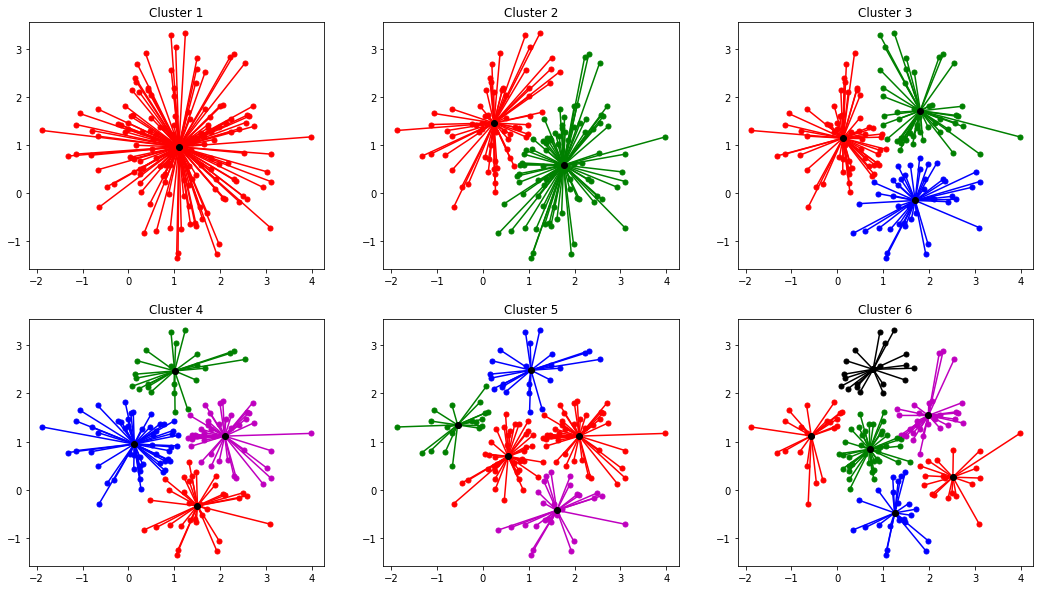

In [4]:
# parameters
N=50

# create randomly centroids of cluster
A=[1,1]

# generate 3 different datasets
a=[A[0]+np.random.randn(N),A[1]+np.random.randn(N)]
b=[A[0]+np.random.randn(N),A[1]+np.random.randn(N)]
c=[A[0]+np.random.randn(N),A[1]+np.random.randn(N)]

data=np.transpose(np.concatenate((a,b,c),axis=1))

# create kmeans model function
def kmeans_model(cluster):
    # Kmeans model
    kmeans=KMeans(n_clusters=cluster)
    kmeans=kmeans.fit(data)

    groupidx=kmeans.predict(data)

    # centroids
    cents=kmeans.cluster_centers_
    return kmeans,groupidx,cents

lineColors='rgbmrkbgm'

# plot
fig,ax=plt.subplots(2,3,figsize=(18,10))
# Cluster 1
kmeans,groupidx,cents=kmeans_model(1)
ax[0][0].set_title('Cluster 1')
for i in range(0,len(data)):
    ax[0][0].plot([data[i,0],cents[groupidx[i],0]],[data[i,1],cents[groupidx[i],1]],lineColors[groupidx[i]],marker='o',markersize=5)
ax[0][0].plot(cents[:,0],cents[:,1],'ko')
    
# Cluster 2
kmeans,groupidx,cents=kmeans_model(2)
ax[0][1].set_title('Cluster 2')
for i in range(0,len(data)):
    ax[0][1].plot([data[i,0],cents[groupidx[i],0]],[data[i,1],cents[groupidx[i],1]],lineColors[groupidx[i]],marker='o',markersize=5)
ax[0][1].plot(cents[:,0],cents[:,1],'ko')

# Cluster 3
kmeans,groupidx,cents=kmeans_model(3)
ax[0][2].set_title('Cluster 3')
for i in range(0,len(data)):
    ax[0][2].plot([data[i,0],cents[groupidx[i],0]],[data[i,1],cents[groupidx[i],1]],lineColors[groupidx[i]],marker='o',markersize=5)
ax[0][2].plot(cents[:,0],cents[:,1],'ko')

# Cluster 4
kmeans,groupidx,cents=kmeans_model(4)
ax[1][0].set_title('Cluster 4')
for i in range(0,len(data)):
    ax[1][0].plot([data[i,0],cents[groupidx[i],0]],[data[i,1],cents[groupidx[i],1]],lineColors[groupidx[i]],marker='o',markersize=5)
ax[1][0].plot(cents[:,0],cents[:,1],'ko')

# Cluster 5
kmeans,groupidx,cents=kmeans_model(5)
ax[1][1].set_title('Cluster 5')
for i in range(0,len(data)):
    ax[1][1].plot([data[i,0],cents[groupidx[i],0]],[data[i,1],cents[groupidx[i],1]],lineColors[groupidx[i]],marker='o',markersize=5)
ax[1][1].plot(cents[:,0],cents[:,1],'ko')

# Cluster 6
kmeans,groupidx,cents=kmeans_model(6)
ax[1][2].set_title('Cluster 6')
for i in range(0,len(data)):
    ax[1][2].plot([data[i,0],cents[groupidx[i],0]],[data[i,1],cents[groupidx[i],1]],lineColors[groupidx[i]],marker='o',markersize=5)
ax[1][2].plot(cents[:,0],cents[:,1],'ko')

plt.show()

# Dbscan vs K-means